In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hann
from scipy.signal import stft
from scipy.fft import fft


In [2]:
frequencies = [1, 5]  # Frequencies in Hz
amplitudes = [1.0, 0.7]  # Amplitudes
sampling_frequency = 5000 # Sampling frequency in Hz
duration = 3  # Duration in seconds

num_samples = int(duration * sampling_frequency)
t = np.linspace(0, duration, num_samples)
sine_wave_1 = amplitudes[0] * np.sin(2 * np.pi * frequencies[0] * t)
sine_wave_5 = amplitudes[1] * np.sin(2 * np.pi * frequencies[1] * t)
extended_signal = np.concatenate((sine_wave_1, sine_wave_5))
signal_time = np.arange(0, 6, 1/sampling_frequency)

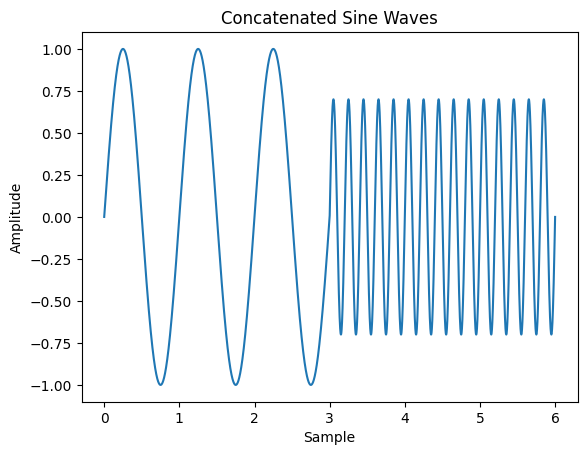

In [3]:
plt.figure()
plt.plot(signal_time, extended_signal)
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.title('Concatenated Sine Waves')
plt.show()

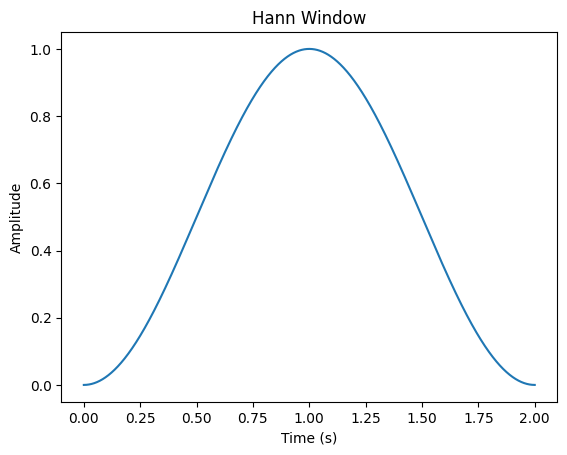

In [4]:
sampling_frequency = 5000  # Sampling frequency in Hz
window_duration = 2  # Window duration in seconds
window_length = int(window_duration * sampling_frequency)

# Calculate the number of samples for the window

# Generate the Hann window
window = hann(window_length)

# Plot the Hann window
time = np.arange(0, window_duration, 1/sampling_frequency)  # Time axis
plt.figure()
plt.plot(time, window)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Hann Window')
plt.show()

In [5]:
def stft(signal, window, sampling_frequency):
    window_length = len(window)
    num_windows = len(signal) // window_length

    # Initialize arrays to store the results
    stft_result = np.zeros((num_windows, window_length), dtype=np.complex128)
    magnitude_spectrum = np.zeros((num_windows, window_length//2 + 1))

    for i in range(num_windows):
        start_idx = i * window_length
        end_idx = start_idx + window_length

        # Apply the window function to the section of the signal
        windowed_signal = signal[start_idx:end_idx] * window

        # Compute the Fourier transform of the windowed signal
        stft_result[i] = fft(windowed_signal)
        magnitude_spectrum[i] = np.abs(stft_result[i][:window_length//2 + 1])

    return stft_result, magnitude_spectrum

In [6]:
def process_signal(signal, window, i):
    extended_signal = signal[i*window_length:(i+1)*window_length] * window
    if i == 0:
        return np.concatenate((extended_signal, np.zeros(signal[(i+1)*window_length:].shape[0])))
    elif i == 1:
        filled_signalp1 = np.concatenate((np.zeros(signal[:i*window_length].shape[0]), extended_signal))
        return np.concatenate((filled_signalp1, np.zeros(signal[(i+1)*window_length:].shape[0])))
    elif i == 2:
        return np.concatenate((np.zeros(signal[:2*window_length].shape[0]), extended_signal))

In [7]:
stft_result, magnitude_spectrum = stft(extended_signal, window, sampling_frequency)

c:\Users\fryde\miniconda3\envs\muzg\lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


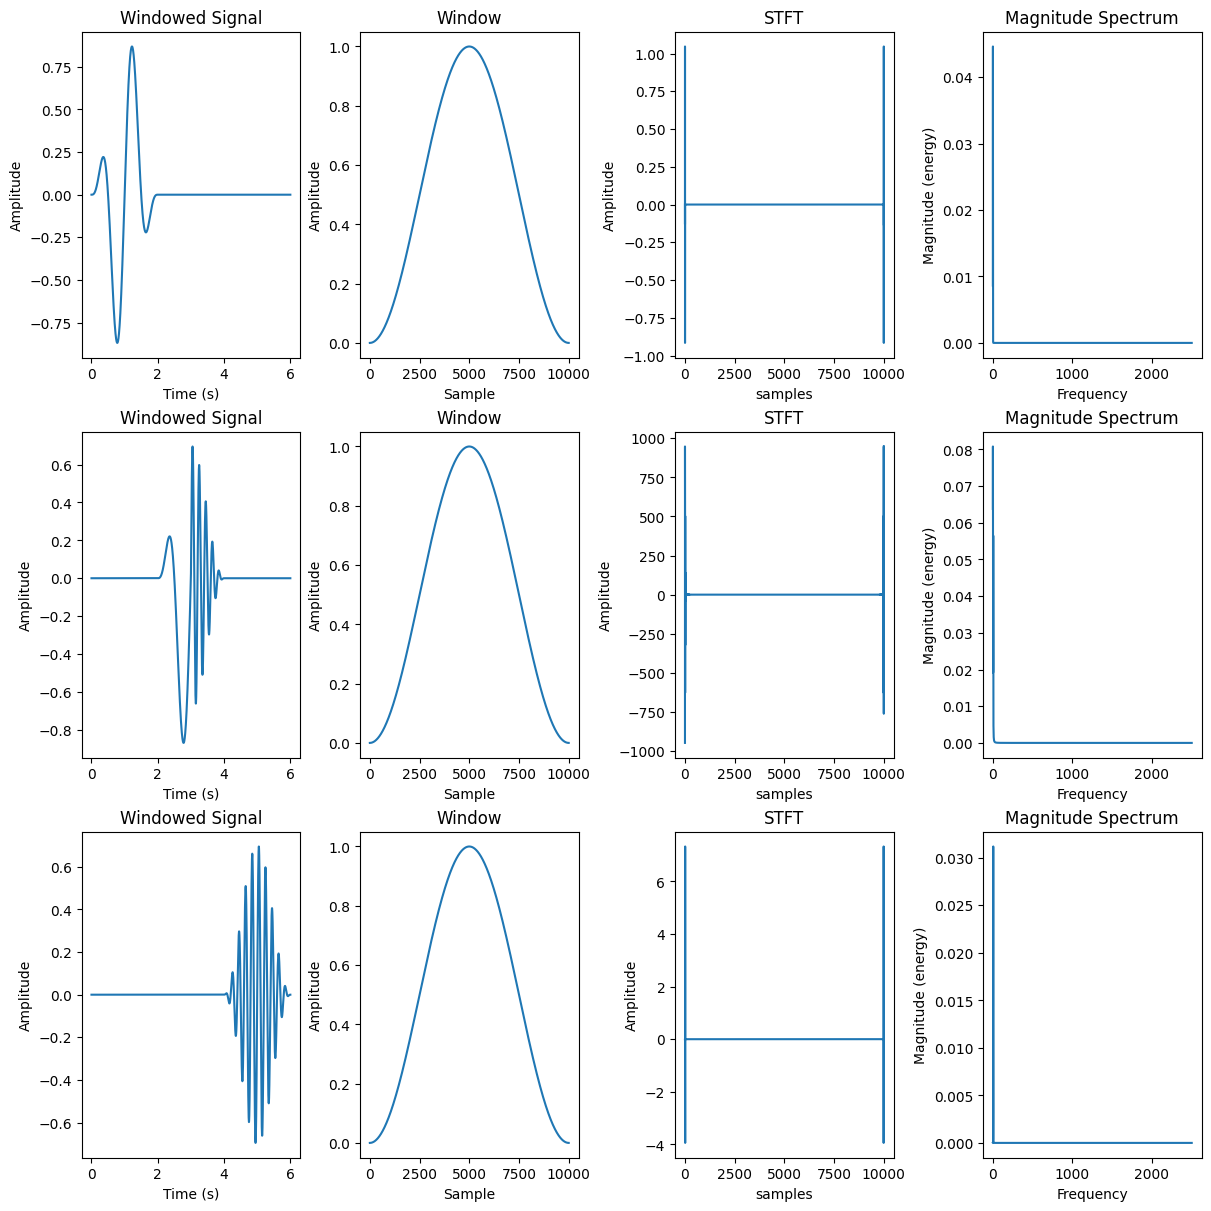

In [8]:
fig, axs = plt.subplots(nrows=stft_result.shape[0], ncols=4, figsize=(12, 4*stft_result.shape[0]), constrained_layout = True)
for i in range(stft_result.shape[0]):
    processed_signal = process_signal(extended_signal, window, i)
    axs[i, 0].plot(signal_time, processed_signal)
    axs[i, 0].set_title('Windowed Signal')
    axs[i, 0].set_xlabel('Time (s)')
    axs[i, 0].set_ylabel('Amplitude')

    axs[i, 1].plot(window)
    axs[i, 1].set_title('Window')
    axs[i, 1].set_xlabel('Sample')
    axs[i, 1].set_ylabel('Amplitude')
    
    axs[i, 2].plot(stft_result[i])
    axs[i, 2].set_title('STFT')
    axs[i, 2].set_xlabel('samples')
    axs[i, 2].set_ylabel('Amplitude')

    axs[i, 3].magnitude_spectrum(processed_signal, Fs=sampling_frequency)
    axs[i, 3].set_title('Magnitude Spectrum')